Data for TEMP---
Mean: 29.089999999999996
Median: 28.92
Standard Deviation: 2.008588515870524

Data for TURB---
Mean: 1.4301724137931036
Median: 0.7
Standard Deviation: 2.1600007982118576

Data for DO---
Mean: 4.624396551724137
Median: 3.995
Standard Deviation: 2.661282884100335



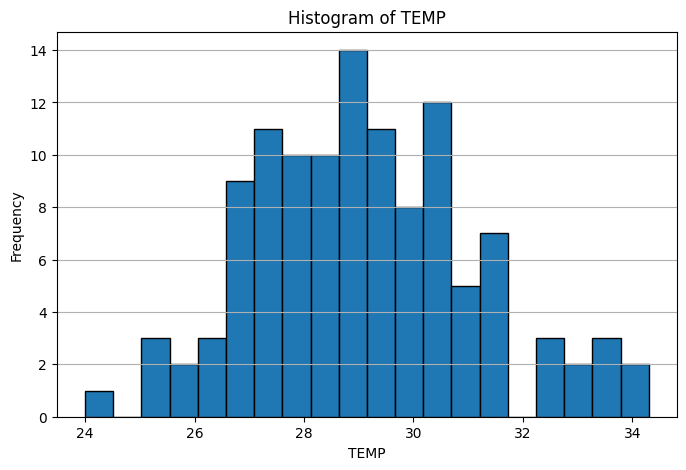

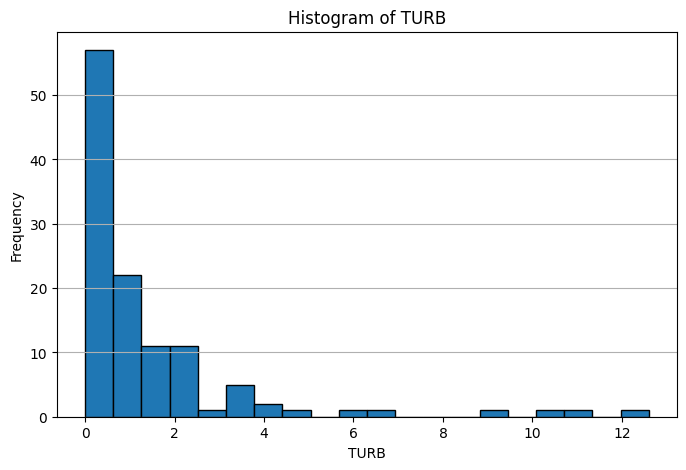

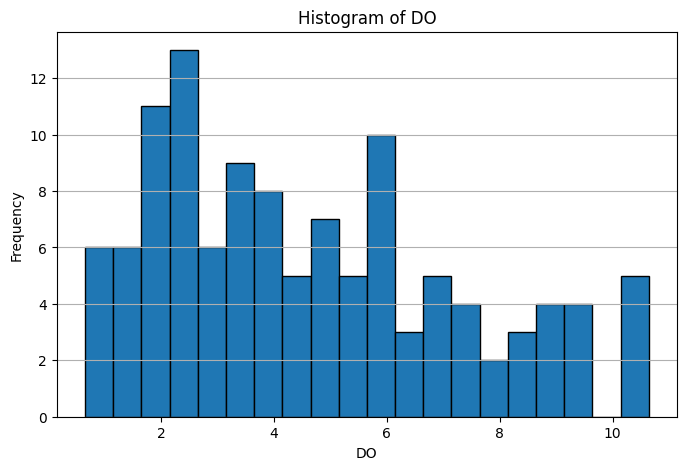

In [21]:
# Gabriella (Brie) Quisumbing 12_4_2024
# Task 1. Data Description.

import pandas as pd
import matplotlib.pyplot as plt

file_path = "EPA_EvergladesDataset_FinalProject_F24.csv"
df = pd.read_csv(file_path)

stats = {}
for column in ["TEMP", "TURB", "DO"]:
    stats[column] = {
        "Mean": df[column].mean(),
        "Median": df[column].median(),
        "Standard Deviation": df[column].std()
    }

for column, data in stats.items():
    print(f"Data for {column}---")
    for stat_name, value in data.items():
        print(f"{stat_name}: {value}")
    print()
    
for column in ["TEMP", "TURB", "DO"]:
    plt.figure(figsize=(8, 5))
    plt.hist(df[column], bins=20, edgecolor="black")
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(axis="y")
    plt.show()

Correlation between DO and TEMP:
Pearson Correlation Coefficient: 0.7835
Spearman Correlation Coefficient: 0.7995

Correlation between DO and TURB:
Pearson Correlation Coefficient: -0.0681
Spearman Correlation Coefficient: -0.1971



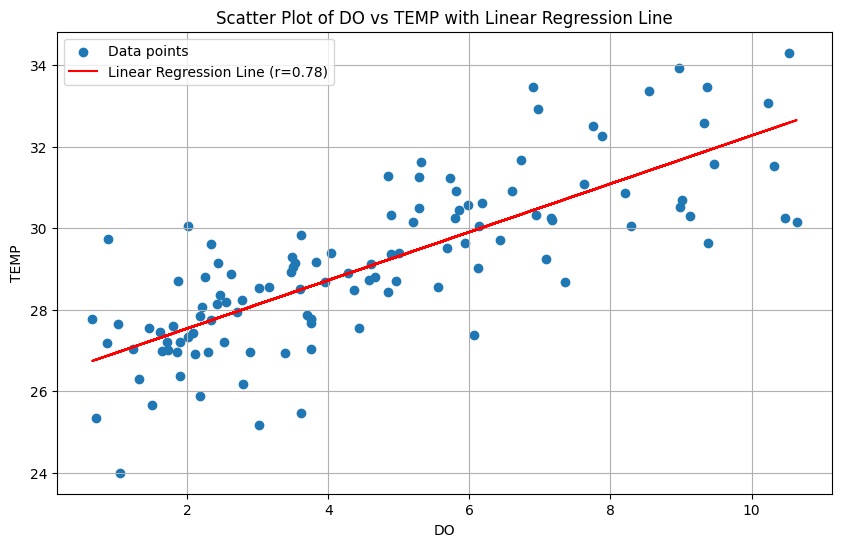

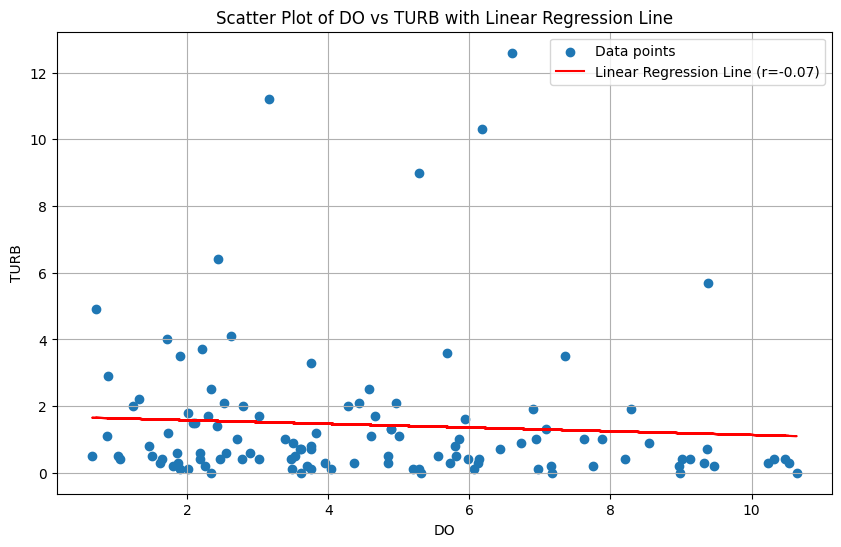

In [45]:
# Task 2. Correlation.

import csv
from scipy import stats
import matplotlib.pyplot as plt

# Load the CSV file and extract relevant columns without pandas
file_path = "EPA_EvergladesDataset_FinalProject_F24.csv"
data = []

with open(file_path, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        data.append(row)

# Extract the columns for TEMP, TURB, and DO
temp = [float(row['TEMP']) for row in data if row['TEMP'] and row['DO'] and row['TURB']]
turb = [float(row['TURB']) for row in data if row['TEMP'] and row['DO'] and row['TURB']]
do = [float(row['DO']) for row in data if row['TEMP'] and row['DO'] and row['TURB']]

# Calculate Pearson and Spearman correlation coefficients between DO and TEMP
pearson_do_temp, spearman_do_temp = stats.pearsonr(do, temp), stats.spearmanr(do, temp)

# Calculate Pearson and Spearman correlation coefficients between DO and TURB
pearson_do_turb, spearman_do_turb = stats.pearsonr(do, turb), stats.spearmanr(do, turb)

# Print the findings neatly
print("Correlation between DO and TEMP:")
print(f"Pearson Correlation Coefficient: {pearson_do_temp.statistic:.4f}")
print(f"Spearman Correlation Coefficient: {spearman_do_temp.correlation:.4f}")
print()

print("Correlation between DO and TURB:")
print(f"Pearson Correlation Coefficient: {pearson_do_turb.statistic:.4f}")
print(f"Spearman Correlation Coefficient: {spearman_do_turb.correlation:.4f}")


print()
data = []

with open(file_path, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        data.append(row)

# Extract the columns for TEMP, TURB, and DO
temp = [float(row['TEMP']) for row in data if row['TEMP'] and row['DO'] and row['TURB']]
turb = [float(row['TURB']) for row in data if row['TEMP'] and row['DO'] and row['TURB']]
do = [float(row['DO']) for row in data if row['TEMP'] and row['DO'] and row['TURB']]

# Perform linear regression between DO and TEMP
slope_do_temp, intercept_do_temp, r_value_do_temp, p_value_do_temp, std_err_do_temp = stats.linregress(do, temp)

# Perform linear regression between DO and TURB
slope_do_turb, intercept_do_turb, r_value_do_turb, p_value_do_turb, std_err_do_turb = stats.linregress(do, turb)

# Generate scatter plot and linear regression line for DO vs TEMP
plt.figure(figsize=(10, 6))
plt.scatter(do, temp, label='Data points')
plt.plot(do, [slope_do_temp * d + intercept_do_temp for d in do], color='red', label=f'Linear Regression Line (r={r_value_do_temp:.2f})')
plt.title("Scatter Plot of DO vs TEMP with Linear Regression Line")
plt.xlabel("DO")
plt.ylabel("TEMP")
plt.legend()
plt.grid(True)
plt.show()

# Generate scatter plot and linear regression line for DO vs TURB
plt.figure(figsize=(10, 6))
plt.scatter(do, turb, label='Data points')
plt.plot(do, [slope_do_turb * d + intercept_do_turb for d in do], color='red', label=f'Linear Regression Line (r={r_value_do_turb:.2f})')
plt.title("Scatter Plot of DO vs TURB with Linear Regression Line")
plt.xlabel("DO")
plt.ylabel("TURB")
plt.legend()
plt.grid(True)
plt.show()

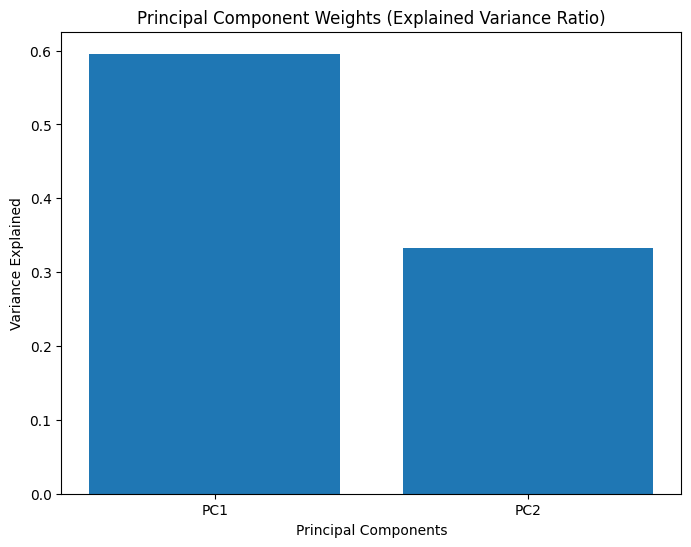

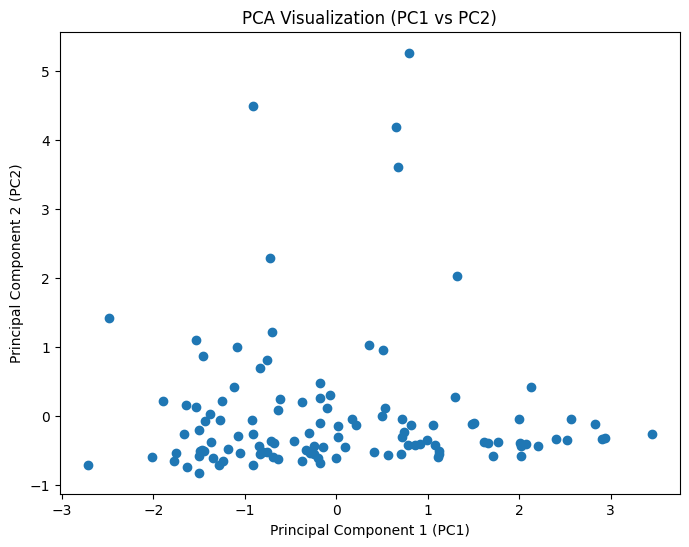

In [47]:
# Task 3 Dimensionality reduction.
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'EPA_EvergladesDataset_FinalProject_F24.csv'
data = pd.read_csv(file_path)

# Extract the relevant columns
relevant_columns = ['TEMP', 'TURB', 'DO']
data_relevant = data[relevant_columns]

# Drop rows with missing values in these columns by creating a new DataFrame
data_relevant_clean = data_relevant.dropna()

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_relevant_clean)

# Perform PCA
pca = PCA(n_components=2)  # We're interested in the first two principal components
pca_result = pca.fit_transform(data_scaled)

# Extract principal component weights (explained variance ratio)
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the principal component weights
plt.figure(figsize=(8, 6))
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio)
plt.title("Principal Component Weights (Explained Variance Ratio)")
plt.xlabel("Principal Components")
plt.ylabel("Variance Explained")
plt.xticks(range(len(explained_variance_ratio)), [f"PC{i+1}" for i in range(len(explained_variance_ratio))])
plt.show()

# Visualize the data on PC1 and PC2
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title("PCA Visualization (PC1 vs PC2)")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.show()
